<a href="https://colab.research.google.com/github/Avii520/Machine-Learning-Project/blob/main/Solar_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q joblib xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Renewable.csv')
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [ ]:
df = df.drop(columns=["Time"])

In [ ]:
X = df.drop(columns=["Energy delta[Wh]"])
y = df["Energy delta[Wh]"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import joblib
joblib.dump(lr_model, '/content/drive/MyDrive/lr_model.pkl')

['/content/drive/MyDrive/lr_model.pkl']

In [ ]:
y_pred = lr_model.predict(X_test)

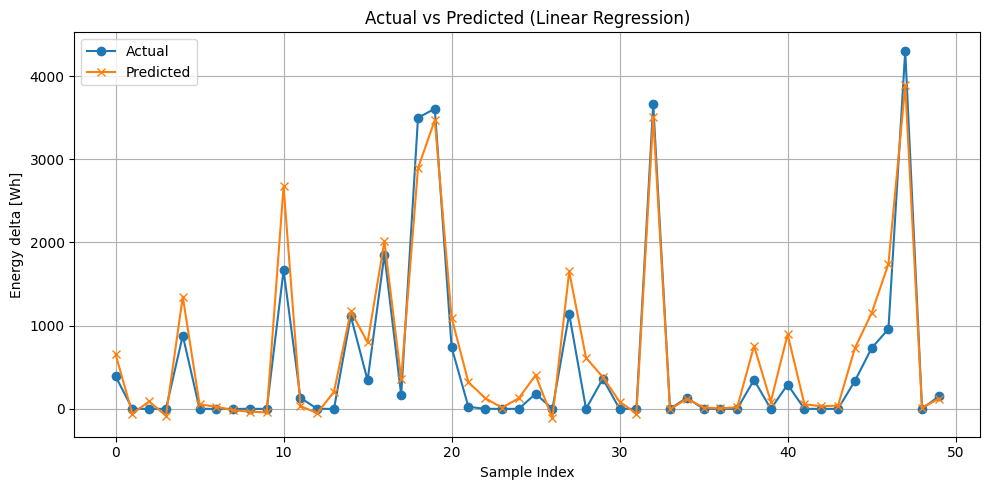

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

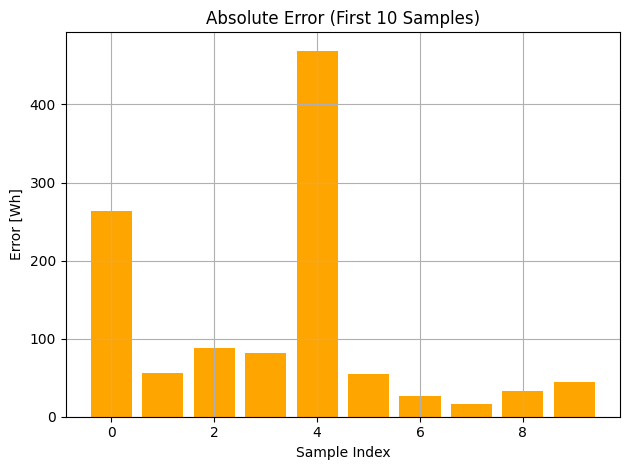

In [ ]:
error = abs(y_test.values[:10] - y_pred[:10])
plt.bar(range(10), error, color='orange')
plt.title("Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 396.71
MAE: 224.02
R² Score: 0.86


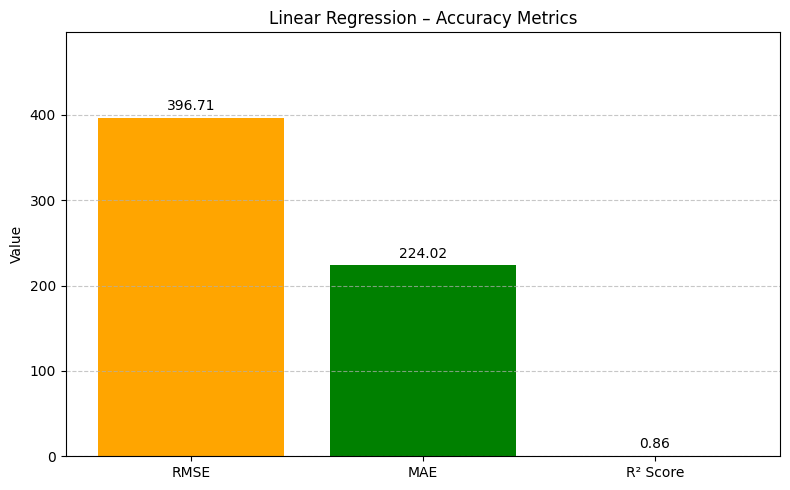

In [ ]:
import matplotlib.pyplot as plt

# Accuracy metrics for Linear Regression
metrics = ['RMSE', 'MAE', 'R² Score']
values = [396.71, 224.02, 0.86]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['orange', 'green', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Linear Regression – Accuracy Metrics')
plt.ylabel('Value')
plt.ylim(0, max(values) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
result_lr = pd.DataFrame({
    "Model": ["Linear Regression"],
    "RMSE": [396.71],
    "MAE": [224.02],
    "R² Score": [0.86]
})

result_lr.to_csv('/content/drive/MyDrive/lr_result.csv', index=False)

result_lr


,Model,RMSE,MAE,R² Score
0,Linear Regression,396.71,224.02,0.86


In [ ]:


#Decision Tree#


from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
import joblib
joblib.dump(dt_model, '/content/drive/MyDrive/dt_model.pkl')

['/content/drive/MyDrive/dt_model.pkl']

In [ ]:
y_pred_dt = dt_model.predict(X_test)

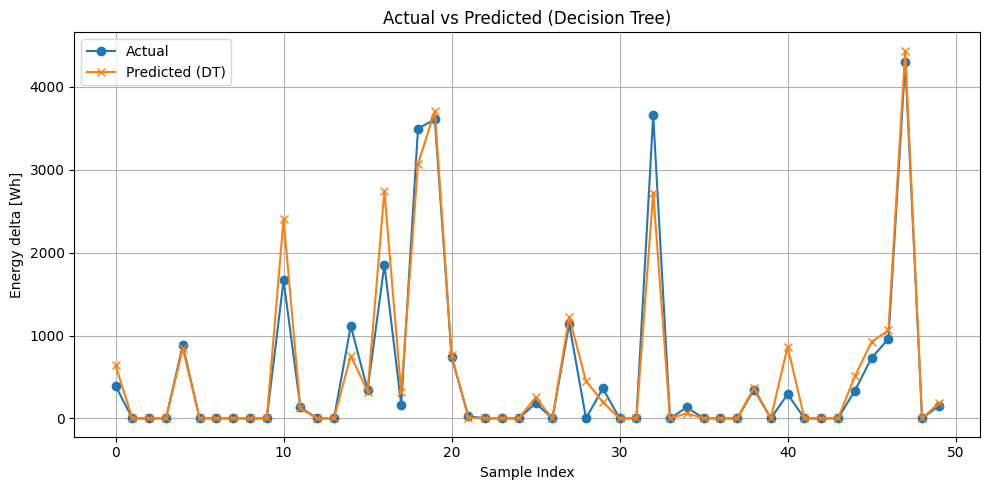

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred_dt[:50], label="Predicted (DT)", marker='x')
plt.title("Actual vs Predicted (Decision Tree)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

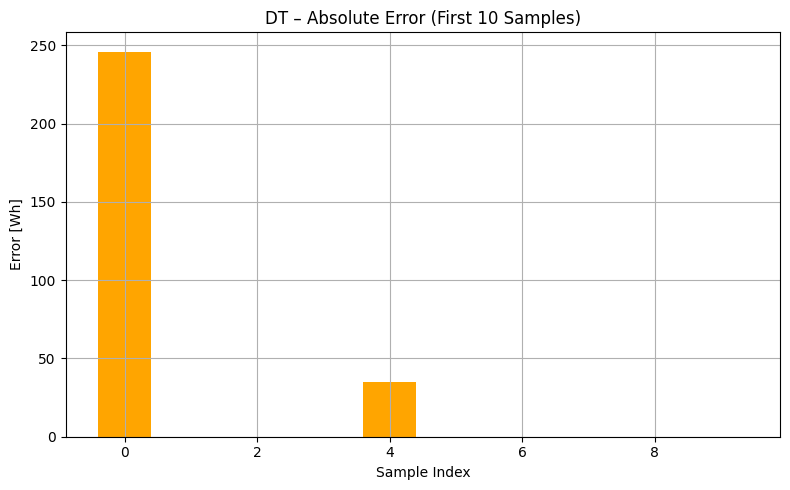

In [ ]:
error_dt = abs(y_test.values[:10] - y_pred_dt[:10])

plt.figure(figsize=(8, 5))
plt.bar(range(10), error_dt, color='orange')
plt.title("DT – Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"DT RMSE: {rmse_dt:.2f}")
print(f"DT MAE: {mae_dt:.2f}")
print(f"DT R² Score: {r2_dt:.2f}")

DT RMSE: 378.01
DT MAE: 148.32
DT R² Score: 0.87


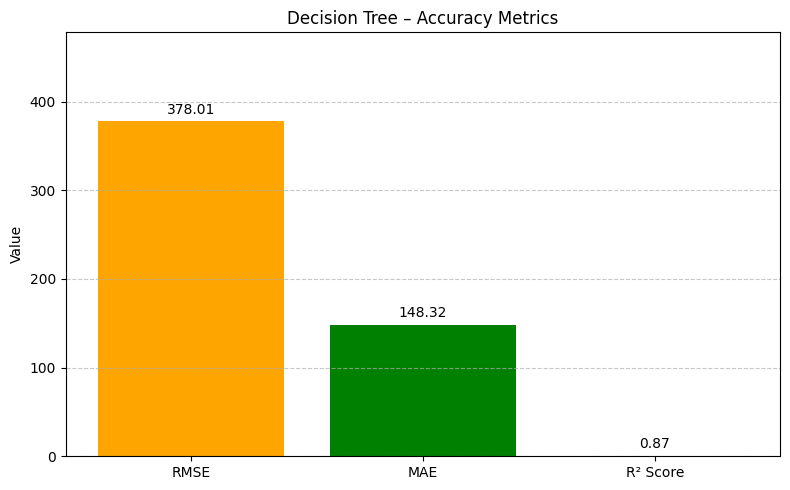

In [ ]:
# Accuracy metrics for Decision Tree
metrics_dt = ['RMSE', 'MAE', 'R² Score']
values_dt = [378.01, 148.32, 0.87]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_dt, values_dt, color=['orange', 'green', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Decision Tree – Accuracy Metrics')
plt.ylabel('Value')
plt.ylim(0, max(values_dt) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
result_dt = pd.DataFrame({
    "Model": ["Decision Tree"],
    "RMSE": [378.01],
    "MAE": [148.32],
    "R² Score": [0.87]
})

result_dt.to_csv('/content/drive/MyDrive/dt_result.csv', index=False)

result_dt

,Model,RMSE,MAE,R² Score
0,Decision Tree,378.01,148.32,0.87


In [ ]:


##KNN

from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
import joblib
joblib.dump(knn_model, '/content/drive/MyDrive/knn_model.pkl')

['/content/drive/MyDrive/knn_model.pkl']

In [ ]:
y_pred_knn = knn_model.predict(X_test)

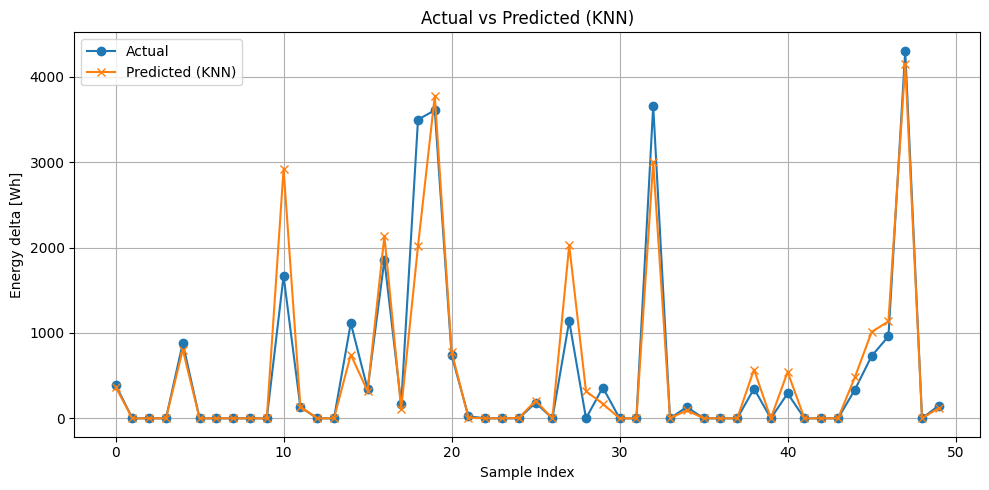

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred_knn[:50], label="Predicted (KNN)", marker='x')
plt.title("Actual vs Predicted (KNN)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

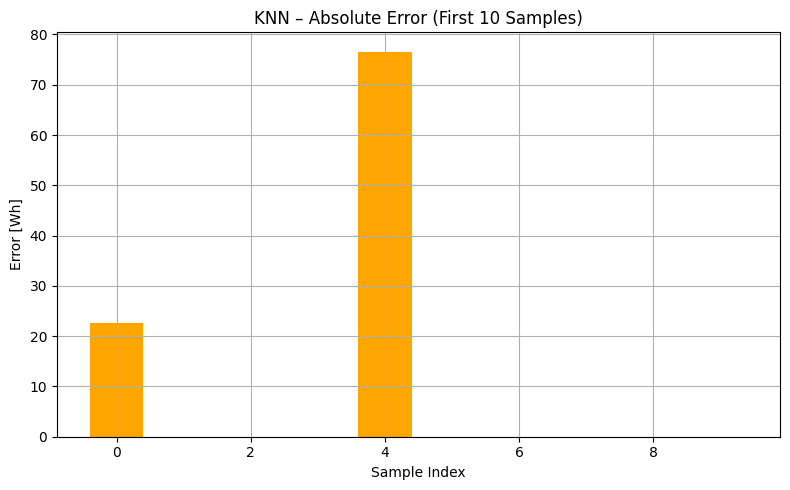

In [ ]:
error_knn = abs(y_test.values[:10] - y_pred_knn[:10])

plt.figure(figsize=(8, 5))
plt.bar(range(10), error_knn, color='orange')
plt.title("KNN – Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN RMSE: {rmse_knn:.2f}")
print(f"KNN MAE: {mae_knn:.2f}")
print(f"KNN R² Score: {r2_knn:.2f}")

KNN RMSE: 293.76
KNN MAE: 118.91
KNN R² Score: 0.92


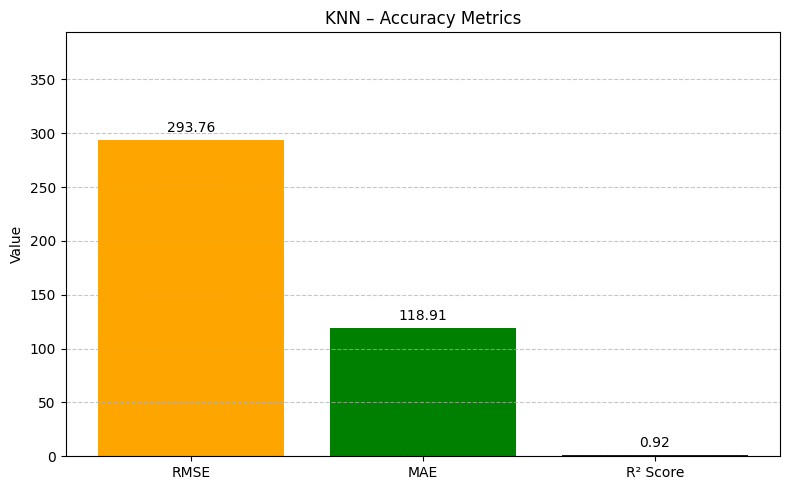

In [ ]:
metrics_knn = ['RMSE', 'MAE', 'R² Score']
values_knn = [293.76, 118.91, 0.92]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_knn, values_knn, color=['orange', 'green', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.title('KNN – Accuracy Metrics')
plt.ylabel('Value')
plt.ylim(0, max(values_knn) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
result_knn = pd.DataFrame({
    "Model": ["KNN"],
    "RMSE": [293.76],
    "MAE": [118.91],
    "R² Score": [0.92]
})

result_knn.to_csv('/content/drive/MyDrive/knn_result.csv', index=False)

result_knn

,Model,RMSE,MAE,R² Score
0,KNN,293.76,118.91,0.92


In [ ]:


##Random Forest

from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
import joblib
joblib.dump(rf_model, '/content/drive/MyDrive/rf_model.pkl')

['/content/drive/MyDrive/rf_model.pkl']

In [ ]:
y_pred_rf = rf_model.predict(X_test)

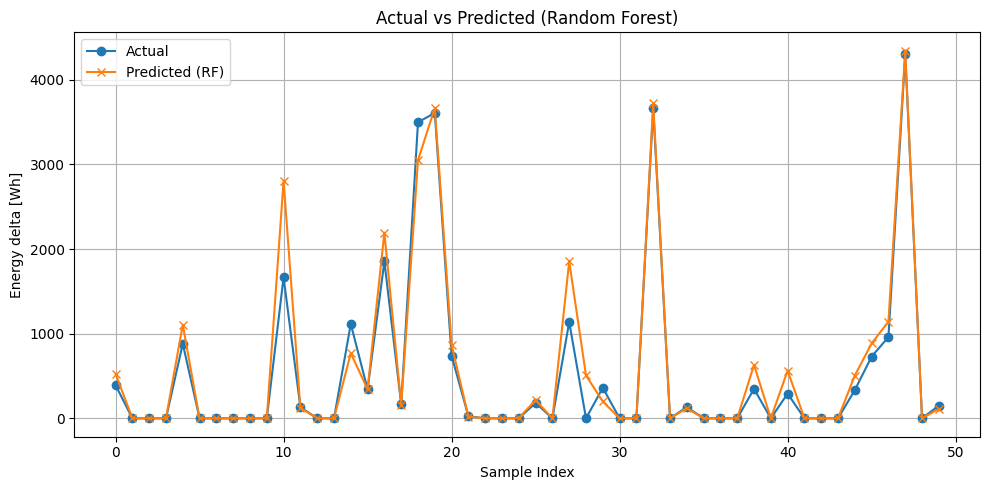

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred_rf[:50], label="Predicted (RF)", marker='x')
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

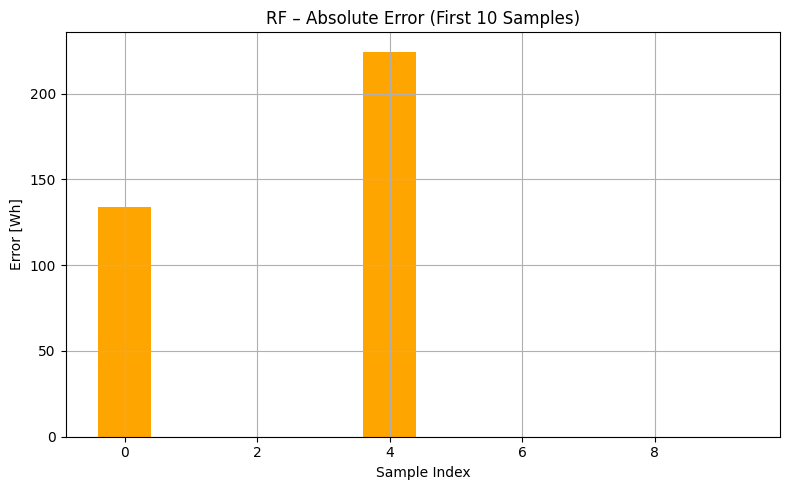

In [ ]:
import numpy as np

absolute_errors_rf = np.abs(y_test.values[:10] - y_pred_rf[:10])

plt.figure(figsize=(8, 5))
plt.bar(range(10), absolute_errors_rf, color='orange')
plt.title("RF – Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RF RMSE: {rmse_rf:.2f}")
print(f"RF MAE: {mae_rf:.2f}")
print(f"RF R² Score: {r2_rf:.2f}")

RF RMSE: 264.56
RF MAE: 106.02
RF R² Score: 0.94


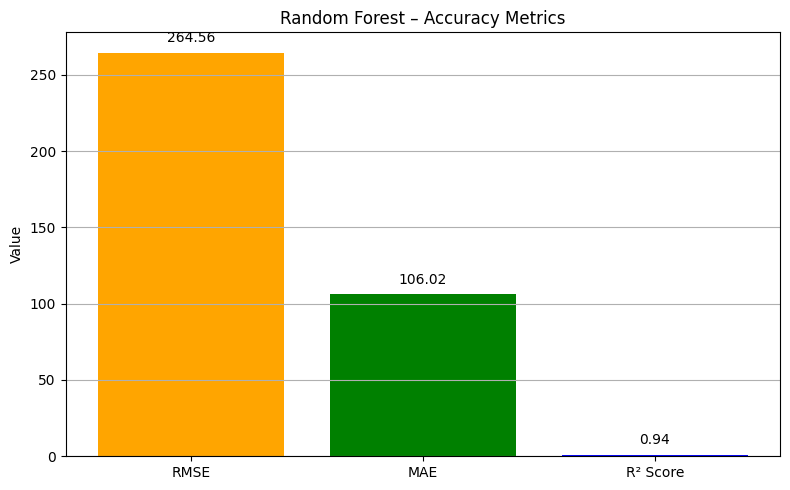

In [ ]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'R² Score']
values = [264.56, 106.02, 0.94]
colors = ['orange', 'green', 'blue']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f"{yval:.2f}", ha='center', va='bottom')

plt.title('Random Forest – Accuracy Metrics')
plt.ylabel('Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
rf_result = pd.DataFrame([{
    "Model": "Random Forest",
    "RMSE": 264.56,
    "MAE": 106.02,
    "R² Score": 0.94
}])

rf_result.to_csv('/content/drive/MyDrive/rf_result.csv', index=False)
rf_result

,Model,RMSE,MAE,R² Score
0,Random Forest,264.56,106.02,0.94


In [ ]:


##XGBoost

from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(verbosity=0, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
import joblib
joblib.dump(xgb_model, '/content/drive/MyDrive/xgb_model.pkl')

['/content/drive/MyDrive/xgb_model.pkl']

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

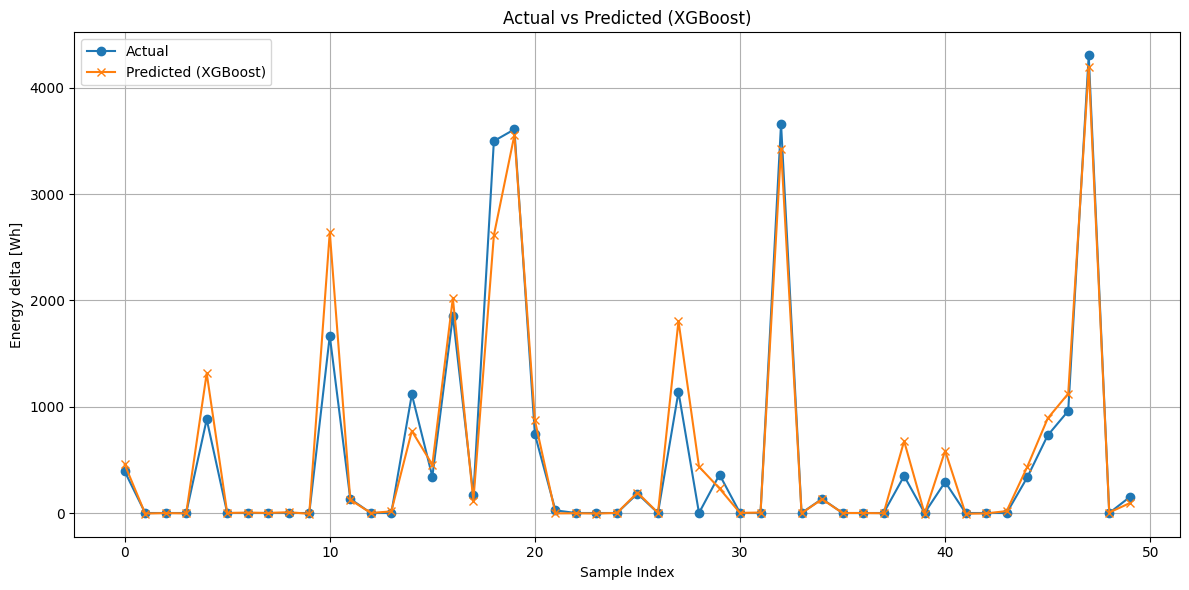

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred_xgb[:50], label='Predicted (XGBoost)', marker='x')
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Sample Index')
plt.ylabel('Energy delta [Wh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

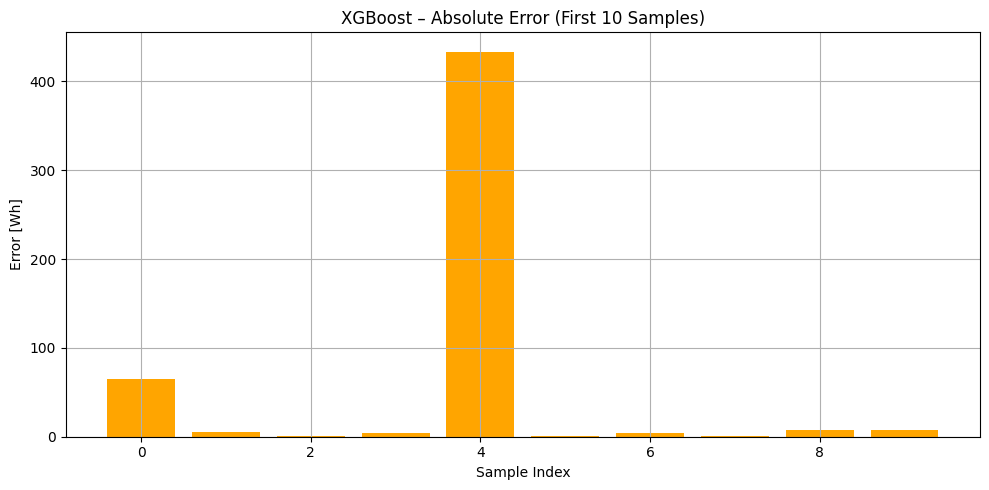

In [ ]:
import numpy as np

abs_error_xgb = np.abs(y_test.values[:10] - y_pred_xgb[:10])

plt.figure(figsize=(10, 5))
plt.bar(range(10), abs_error_xgb, color='orange')
plt.title("XGBoost – Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

XGBoost RMSE: 269.53
XGBoost MAE: 114.61
XGBoost R² Score: 0.93


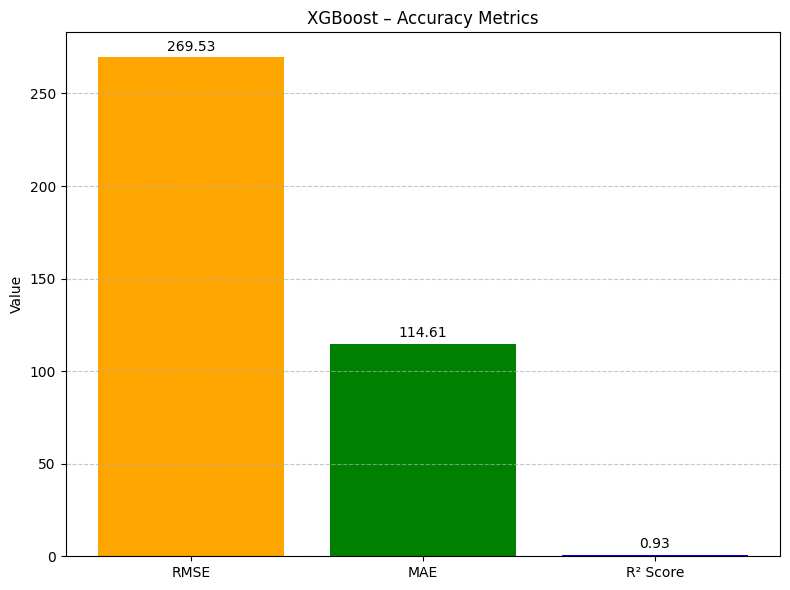

In [ ]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'R² Score']
values = [rmse_xgb, mae_xgb, r2_xgb]

colors = ['orange', 'green', 'blue']

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.2f}', ha='center', va='bottom')

plt.title('XGBoost – Accuracy Metrics')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

xgb_result = pd.DataFrame({
    'Model': ['XGBoost'],
    'RMSE': [rmse_xgb],
    'MAE': [mae_xgb],
    'R² Score': [r2_xgb]
})

xgb_result.to_csv('/content/drive/MyDrive/xgb_result.csv', index=False)
xgb_result

,Model,RMSE,MAE,R² Score
0,XGBoost,269.53035,114.60997,0.934074


In [ ]:


##XGBoost Tuning

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_base = XGBRegressor(objective='reg:squarederror', verbosity=0, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 6, 8], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, '/content/drive/MyDrive/xgb_tuned_model.pkl')

['/content/drive/MyDrive/xgb_tuned_model.pkl']

In [ ]:
y_pred_xgb_tuned = grid_search.best_estimator_.predict(X_test)

import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted (XGB Tuned)': y_pred_xgb_tuned[:10]
})

comparison_df

,Actual,Predicted (XGB Tuned)
0,392,556.918213
1,0,-10.523336
2,0,-1.512411
3,0,0.750104
4,881,1219.128296
5,0,-0.773919
6,0,1.386826
7,0,0.466911
8,0,-3.036684
9,0,7.956182


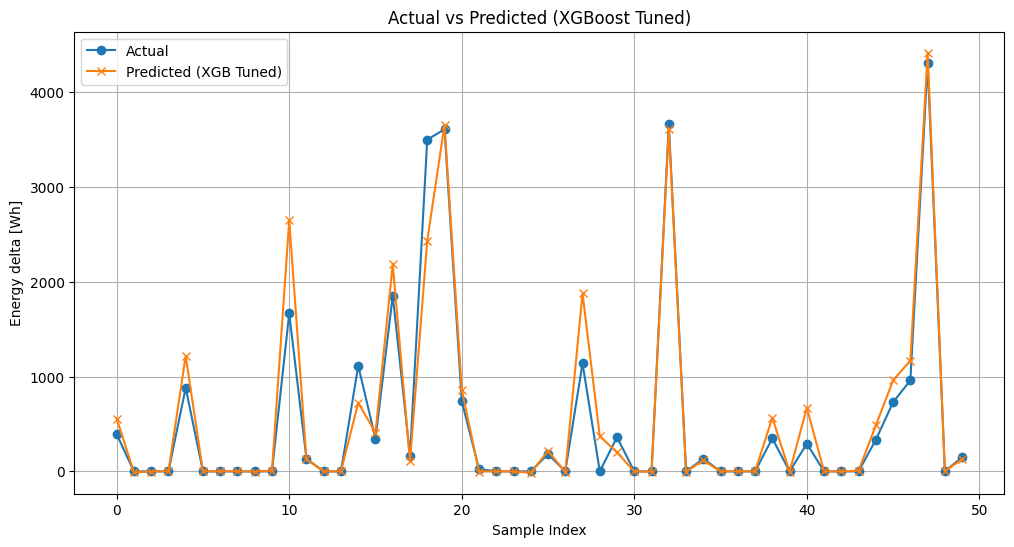

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred_xgb_tuned[:50], label='Predicted (XGB Tuned)', marker='x')
plt.title("Actual vs Predicted (XGBoost Tuned)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.show()

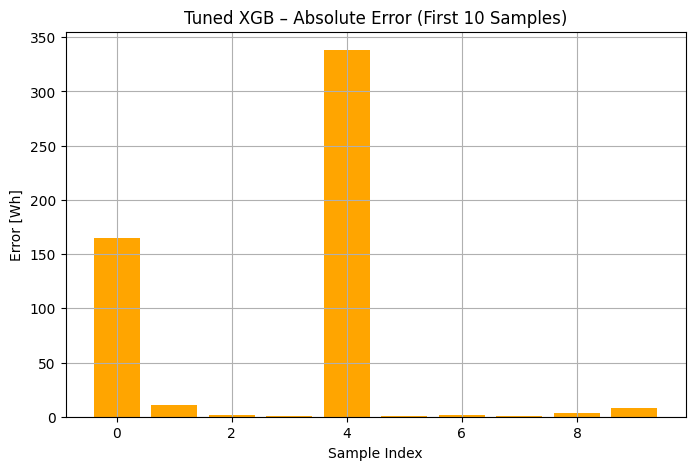

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

abs_errors = np.abs(y_test.values[:10] - y_pred_xgb_tuned[:10])

plt.figure(figsize=(8, 5))
plt.bar(range(10), abs_errors, color='orange')
plt.title("Tuned XGB – Absolute Error (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Error [Wh]")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"Tuned XGBoost RMSE: {rmse_xgb_tuned:.2f}")
print(f"Tuned XGBoost MAE: {mae_xgb_tuned:.2f}")
print(f"Tuned XGBoost R² Score: {r2_xgb_tuned:.2f}")

Tuned XGBoost RMSE: 259.18
Tuned XGBoost MAE: 108.01
Tuned XGBoost R² Score: 0.94


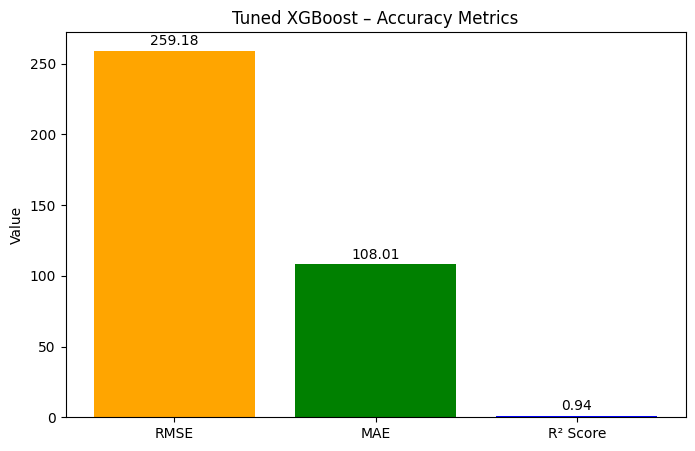

In [ ]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'R² Score']
values = [rmse_xgb_tuned, mae_xgb_tuned, r2_xgb_tuned]
colors = ['orange', 'green', 'blue']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 2, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Tuned XGBoost – Accuracy Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
import pandas as pd

xgb_tuned_results = pd.DataFrame({
    'Model': ['Tuned XGBoost'],
    'RMSE': [rmse_xgb_tuned],
    'MAE': [mae_xgb_tuned],
    'R² Score': [r2_xgb_tuned]
})

xgb_tuned_results

,Model,RMSE,MAE,R² Score
0,Tuned XGBoost,259.18169,108.010757,0.93904


In [ ]:


##LightGBM

!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 157420, number of used features: 15
[LightGBM] [Info] Start training from score 571.989080


LGBMRegressor(random_state=42)

In [ ]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgb_model, '/content/drive/MyDrive/lgb_model.pkl')

['/content/drive/MyDrive/lgb_model.pkl']

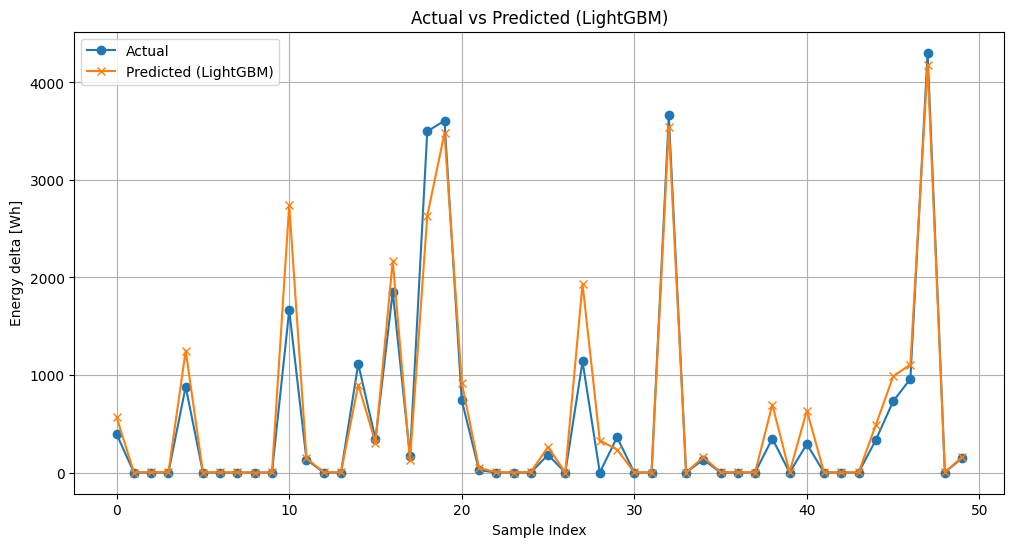

In [ ]:
import matplotlib.pyplot as plt

y_pred_lgb = lgb_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred_lgb[:50], label='Predicted (LightGBM)', marker='x')
plt.title('Actual vs Predicted (LightGBM)')
plt.xlabel('Sample Index')
plt.ylabel('Energy delta [Wh]')
plt.legend()
plt.grid(True)
plt.show()

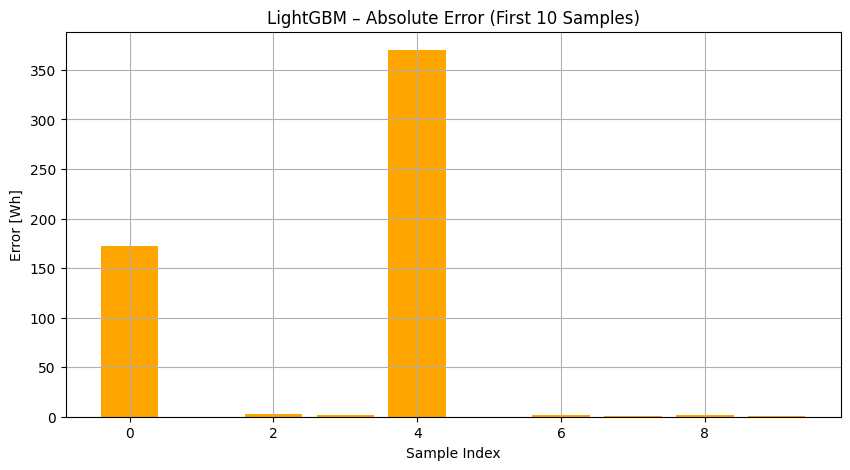

In [ ]:
import numpy as np

# Calculate absolute errors for first 10 test samples
abs_errors_lgb = np.abs(y_test[:10].values - y_pred_lgb[:10])

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(10), abs_errors_lgb, color='orange')
plt.title('LightGBM – Absolute Error (First 10 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Error [Wh]')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_lgb = mean_squared_error(y_test, y_pred_lgb) ** 0.5

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM RMSE: {rmse_lgb:.2f}")
print(f"LightGBM MAE: {mae_lgb:.2f}")
print(f"LightGBM R² Score: {r2_lgb:.2f}")

LightGBM RMSE: 277.35
LightGBM MAE: 118.01
LightGBM R² Score: 0.93


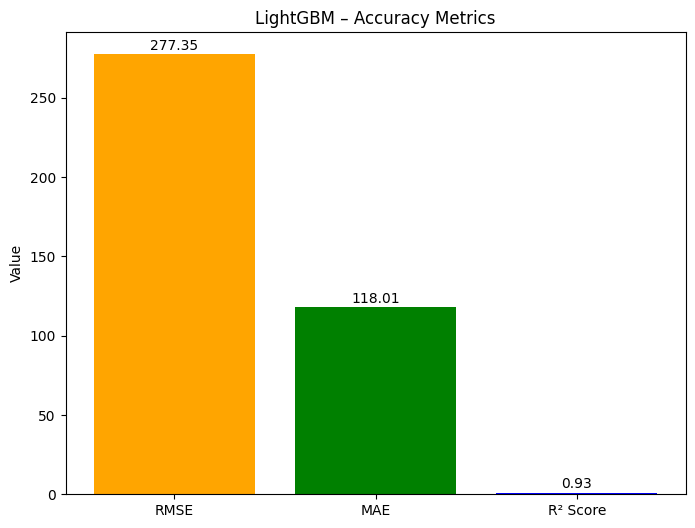

In [ ]:
import matplotlib.pyplot as plt

metrics = ['RMSE', 'MAE', 'R² Score']
values = [rmse_lgb, mae_lgb, r2_lgb]
colors = ['orange', 'green', 'blue']

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

for bar, val in zip(bars, values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{val:.2f}', ha='center', va='bottom')

plt.title('LightGBM – Accuracy Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
import pandas as pd

lgb_results = pd.DataFrame({
    'Model': ['LightGBM'],
    'RMSE': [rmse_lgb],
    'MAE': [mae_lgb],
    'R² Score': [r2_lgb]
})

lgb_results.to_csv('/content/drive/MyDrive/lgb_result.csv', index=False)
lgb_results

,Model,RMSE,MAE,R² Score
0,LightGBM,277.348918,118.009854,0.930194


In [ ]:
# Saving Tuned XGBoost result
import pandas as pd

tuned_xgb_result = pd.DataFrame({
    'Model': ['Tuned XGBoost'],
    'RMSE': [rmse_xgb_tuned],
    'MAE': [mae_xgb_tuned],
    'R² Score': [r2_xgb_tuned]
})

tuned_xgb_result.to_csv('/content/drive/MyDrive/xgb_tuned_result.csv', index=False)


In [ ]:
import pandas as pd

lr_result = pd.read_csv('/content/drive/MyDrive/lr_result.csv')
dt_result = pd.read_csv('/content/drive/MyDrive/dt_result.csv')
knn_result = pd.read_csv('/content/drive/MyDrive/knn_result.csv')
rf_result = pd.read_csv('/content/drive/MyDrive/rf_result.csv')
xgb_result = pd.read_csv('/content/drive/MyDrive/xgb_result.csv')
xgb_tuned_result = pd.read_csv('/content/drive/MyDrive/xgb_tuned_result.csv')
lgb_result = pd.read_csv('/content/drive/MyDrive/lgb_result.csv')

# Combine all results
all_models_result = pd.concat([
    lr_result,
    dt_result,
    knn_result,
    rf_result,
    xgb_result,
    xgb_tuned_result,
    lgb_result
], ignore_index=True)

# Show combined table
import matplotlib.pyplot as plt
import seaborn as sns

display(all_models_result)


,Model,RMSE,MAE,R² Score
0,Linear Regression,396.710000,224.020000,0.860000
1,Decision Tree,378.010000,148.320000,0.870000
2,KNN,293.760000,118.910000,0.920000
3,Random Forest,264.560000,106.020000,0.940000
4,XGBoost,269.530350,114.609970,0.934074
5,Tuned XGBoost,259.181690,108.010757,0.939040
6,LightGBM,277.348918,118.009854,0.930194


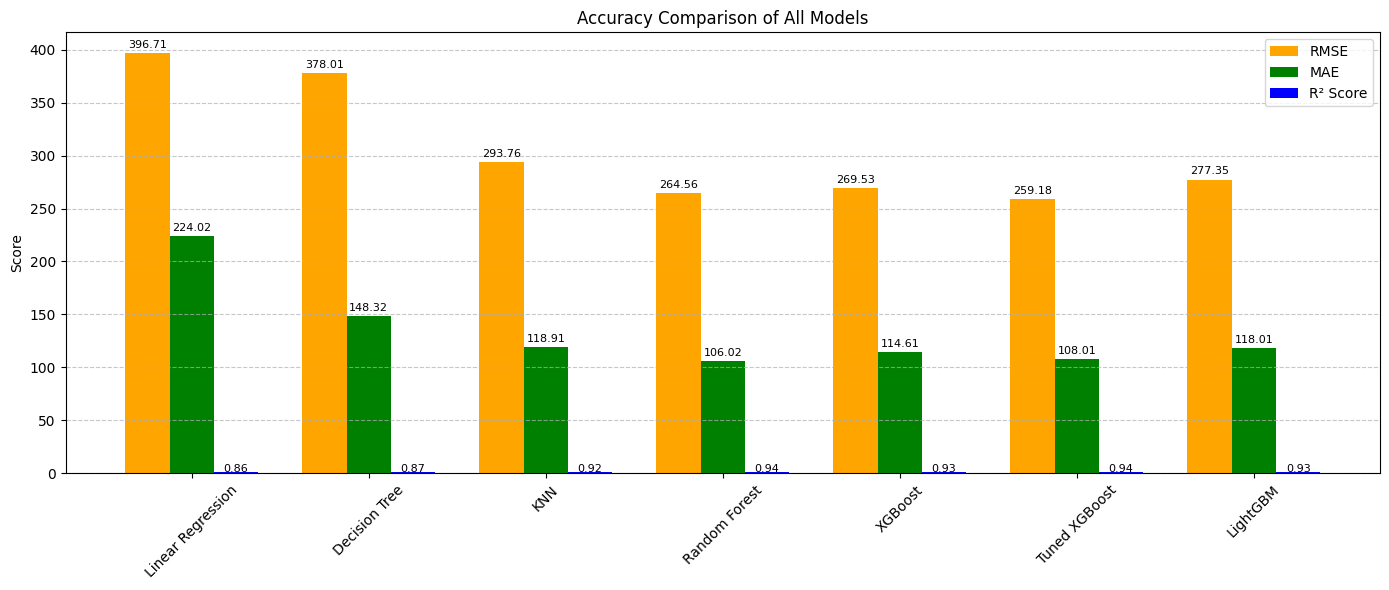

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

results_df = pd.concat([lr_result, dt_result, knn_result, rf_result, xgb_result, tuned_xgb_result, lgb_result], ignore_index=True)

bar_width = 0.25
x = np.arange(len(results_df['Model']))

plt.figure(figsize=(14, 6))

plt.bar(x - bar_width, results_df['RMSE'], width=bar_width, label='RMSE', color='orange')

plt.bar(x, results_df['MAE'], width=bar_width, label='MAE', color='green')

plt.bar(x + bar_width, results_df['R² Score'], width=bar_width, label='R² Score', color='blue')

for i in range(len(results_df)):
    plt.text(x[i] - bar_width, results_df['RMSE'][i] + 5, f"{results_df['RMSE'][i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i], results_df['MAE'][i] + 5, f"{results_df['MAE'][i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + bar_width, results_df['R² Score'][i] + 0.01, f"{results_df['R² Score'][i]:.2f}", ha='center', fontsize=8)

plt.xticks(x, results_df['Model'], rotation=45)
plt.ylabel('Score')
plt.title('Accuracy Comparison of All Models')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
## Deep Neural Network (DNN)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Renewable.csv')
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [ ]:
df = df.drop(columns=["Time"])

In [ ]:
X = df.drop(columns=["Energy delta[Wh]"])
y = df["Energy delta[Wh]"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test_scaled.astype('float32')
y_train_scaled = y_train_scaled.astype('float32')
y_test_scaled = y_test_scaled.astype('float32')

In [ ]:
# Model Build
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.25),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')  # regression output
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
# Train
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=200,
                    batch_size=64,
                    callbacks=[early_stop, lr_reduce, checkpoint],
                    verbose=1)

Epoch 1/200
2454/2460 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3073 - mae: 0.3161
Epoch 1: val_loss improved from inf to 0.02949, saving model to best_model.keras
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.3067 - mae: 0.3157 - val_loss: 0.0295 - val_mae: 0.0347 - learning_rate: 0.0010
Epoch 2/200
2452/2460 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mae: 0.0526
Epoch 2: val_loss improved from 0.02949 to 0.01974, saving model to best_model.keras
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 0.0304 - mae: 0.0526 - val_loss: 0.0197 - val_mae: 0.0363 - learning_rate: 0.0010
Epoch 3/200
2457/2460 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 - mae: 0.0487
Epoch 3: val_loss improved from 0.01974 to 0.00825, saving model to best_model.keras
2460/2460 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0185 - mae: 0.0487 - val_loss: 0.0082 - val_mae: 0.0353 - learning_rate: 0.0010
Epoch 4/200
2453/2460 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mae: 0.0465
Epoch 4: va

In [ ]:
best_model = tf.keras.models.load_model("best_model.keras")

ValueError: File not found: filepath=best_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
best_model.save('/content/drive/MyDrive/tuned_dnn_model.keras')
joblib.dump(scaler_X, '/content/drive/MyDrive/scaler_X.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/scaler_y.pkl')

NameError: name 'best_model' is not defined

In [ ]:
import tensorflow as tf
import joblib

# Load trained DNN model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/tuned_dnn_model.keras')

# Load scalers
scaler_X = joblib.load('/content/drive/MyDrive/scaler_X.pkl')
scaler_y = joblib.load('/content/drive/MyDrive/scaler_y.pkl')

print("✅ DNN model and scalers loaded successfully!")

✅ DNN model and scalers loaded successfully!


In [ ]:
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

1230/1230 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


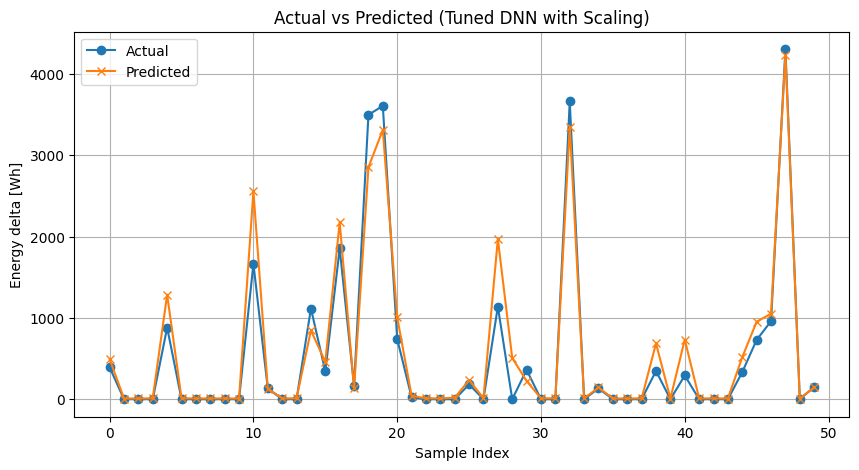

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted (Tuned DNN with Scaling)")
plt.xlabel("Sample Index")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2, 2))

R² Score: 0.93


1230/1230 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


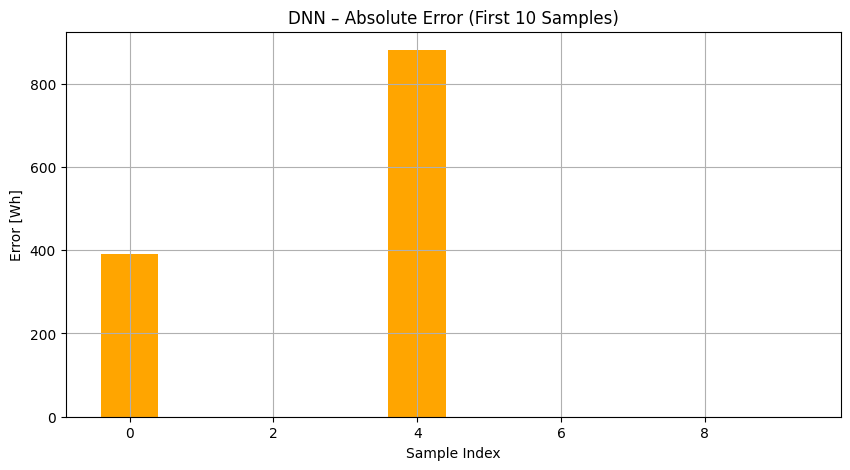

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred_dnn = best_model.predict(X_test_scaled).flatten()

# Calculate absolute errors for first 10 test samples
abs_errors_dnn = np.abs(y_test[:10].values - y_pred_dnn[:10])

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(10), abs_errors_dnn, color='orange')
plt.title('DNN – Absolute Error (First 10 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Error [Wh]')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_dnn = mean_squared_error(y_test, y_pred) ** 0.5
mae_dnn = mean_absolute_error(y_test, y_pred)
r2_dnn = r2_score(y_test, y_pred)

print(f"DNN RMSE: {rmse_dnn:.2f}")
print(f"DNN MAE: {mae_dnn:.2f}")
print(f"DNN R² Score: {r2_dnn:.2f}")

DNN RMSE: 286.10
DNN MAE: 122.59
DNN R² Score: 0.93


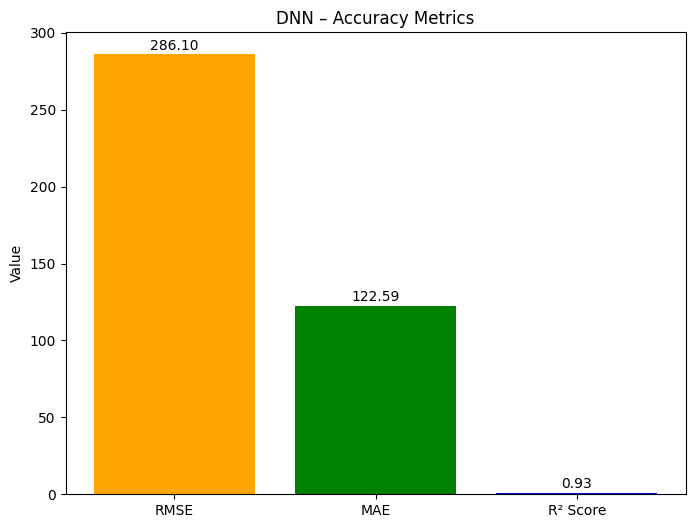

In [ ]:
# Metrics calculation
rmse_dnn = np.sqrt(mean_squared_error(y_test, y_pred))
mae_dnn = mean_absolute_error(y_test, y_pred)
r2_dnn = r2_score(y_test, y_pred)

metrics = ['RMSE', 'MAE', 'R² Score']
values = [rmse_dnn, mae_dnn, r2_dnn]
colors = ['orange', 'green', 'blue']

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=colors)

for bar, val in zip(bars, values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{val:.2f}', ha='center', va='bottom')

plt.title('DNN – Accuracy Metrics')
plt.ylabel('Value')
plt.show()

In [ ]:
# Save to Google Drive
import pandas as pd

dnn_results = pd.DataFrame({
    'Model': ['DNN'],
    'RMSE': [rmse_dnn],
    'MAE': [mae_dnn],
    'R² Score': [r2_dnn]
})

dnn_results.to_csv('/content/drive/MyDrive/dnn_result.csv', index=False)

dnn_results

,Model,RMSE,MAE,R² Score
0,DNN,286.097844,122.591003,0.925721


In [ ]:
import pandas as pd

# Load all previous results
lr_result = pd.read_csv('/content/drive/MyDrive/lr_result.csv')
dt_result = pd.read_csv('/content/drive/MyDrive/dt_result.csv')
knn_result = pd.read_csv('/content/drive/MyDrive/knn_result.csv')
rf_result = pd.read_csv('/content/drive/MyDrive/rf_result.csv')
xgb_result = pd.read_csv('/content/drive/MyDrive/xgb_result.csv')
xgb_tuned_result = pd.read_csv('/content/drive/MyDrive/xgb_tuned_result.csv')
lgb_result = pd.read_csv('/content/drive/MyDrive/lgb_result.csv')
dnn_result = pd.read_csv('/content/drive/MyDrive/dnn_result.csv')

# Combine all results
all_models_result = pd.concat([
    lr_result,
    dt_result,
    knn_result,
    rf_result,
    xgb_result,
    xgb_tuned_result,
    lgb_result,
    dnn_result
], ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sns

display(all_models_result)


,Model,RMSE,MAE,R² Score
0,Linear Regression,396.710000,224.020000,0.860000
1,Decision Tree,378.010000,148.320000,0.870000
2,KNN,293.760000,118.910000,0.920000
3,Random Forest,264.560000,106.020000,0.940000
4,XGBoost,269.530350,114.609970,0.934074
5,Tuned XGBoost,259.181690,108.010757,0.939040
6,LightGBM,277.348918,118.009854,0.930194
7,DNN,286.097844,122.591003,0.925721


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine all results including DNN
results_df = pd.concat([
    lr_result,
    dt_result,
    knn_result,
    rf_result,
    xgb_result,
    tuned_xgb_result,
    lgb_result,
    dnn_result
], ignore_index=True)

plt.figure(figsize=(16, 6))
bar_width = 0.25
x = np.arange(len(results_df['Model']))

# Bar plots
plt.bar(x - bar_width, results_df['RMSE'], width=bar_width, color='#FFA500', label='RMSE (↓ Lower is Better)')
plt.bar(x, results_df['MAE'], width=bar_width, color='#228B22', label='MAE (↓ Lower is Better)')
plt.bar(x + bar_width, results_df['R² Score'] * 100, width=bar_width, color='#1E90FF', label='R² Score % (↑ Higher is Better)')

# Annotate values
for i in range(len(results_df)):
    plt.text(x[i] - bar_width, results_df['RMSE'][i] + 5, f"{results_df['RMSE'][i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i], results_df['MAE'][i] + 5, f"{results_df['MAE'][i]:.2f}", ha='center', fontsize=8)
    plt.text(x[i] + bar_width, (results_df['R² Score'][i] * 100) + 1, f"{results_df['R² Score'][i]*100:.2f}%", ha='center', fontsize=8)

plt.title('🔍 Model Performance Comparison – RMSE vs MAE vs R² Score (%)', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score Value', fontsize=12)
plt.xticks(x, results_df['Model'], rotation=45)
plt.ylim(0, max(results_df['RMSE'].max(), results_df['MAE'].max()) + 50)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.show()

NameError: name 'tuned_xgb_result' is not defined

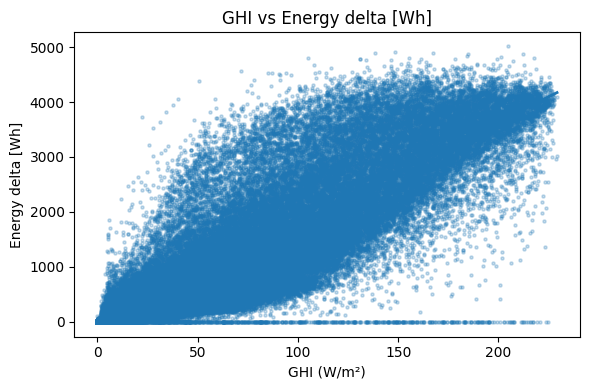

In [ ]:
# FOR Exploring dataset

import numpy as np
import matplotlib.pyplot as plt

x = df['GHI'].values
y = df['Energy delta[Wh]'].values

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=5, alpha=0.25)
# simple trend line (least-squares)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, m*xx + b, linewidth=2)

plt.xlabel('GHI (W/m²)')
plt.ylabel('Energy delta [Wh]')
plt.title('GHI vs Energy delta [Wh]')
plt.tight_layout()
plt.savefig('Fig_3_1_GHI_vs_Energy.png', dpi=300)

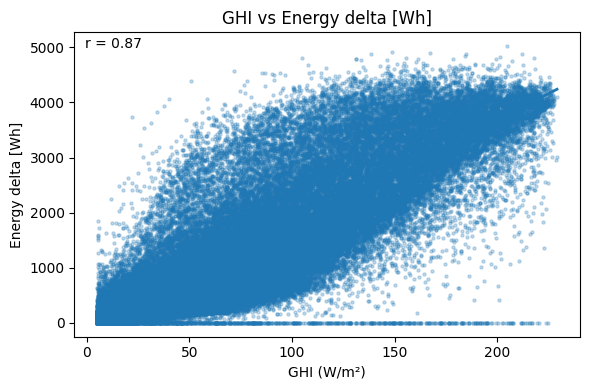

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Daytime-only to avoid heavy clustering at GHI≈0
mask = df['GHI'] > 5
x = df.loc[mask, 'GHI'].values
y = df.loc[mask, 'Energy delta[Wh]'].values

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=5, alpha=0.25)

# Least-squares trend line
m, b = np.polyfit(x, y, 1)
xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, m*xx + b, linewidth=2)

# Pearson correlation (simple)
r = np.corrcoef(x, y)[0,1]
plt.text(0.02, 0.95, f"r = {r:.2f}", transform=plt.gca().transAxes)

plt.xlabel('GHI (W/m²)')
plt.ylabel('Energy delta [Wh]')
plt.title('GHI vs Energy delta [Wh]')
plt.tight_layout()
plt.savefig('Fig_3_1_GHI_vs_Energy.png', dpi=300)


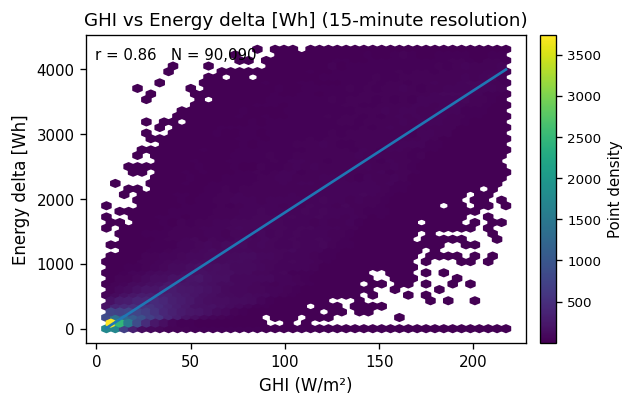

In [ ]:
# Fig. 3.1 – GHI vs Energy (thesis-friendly size)
import numpy as np
import matplotlib.pyplot as plt

# daytime + finite + non-negative energy
x = df['GHI'].to_numpy()
y = df['Energy delta[Wh]'].to_numpy()
mask = (x > 5) & np.isfinite(x) & np.isfinite(y) & (y >= 0)
x, y = x[mask], y[mask]

# clip extreme outliers so the plot looks clear
lx, hx = np.percentile(x, [1, 99.5])
ly, hy = np.percentile(y, [1, 99.5])
clip = (x >= lx) & (x <= hx) & (y >= ly) & (y <= hy)
x, y = x[clip], y[clip]

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 10,          # base font
    'axes.titlesize': 11,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
})

W, H = 5.2, 3.3  # inches → Word এ ideal width ~ 12–13 cm
fig = plt.figure(figsize=(W, H), dpi=120)
ax = fig.add_subplot(111)

hb = ax.hexbin(x, y, gridsize=45, mincnt=1, cmap='viridis')
cb = fig.colorbar(hb, ax=ax, fraction=0.05, pad=0.03)
cb.set_label('Point density', fontsize=9)
cb.ax.tick_params(labelsize=8)

# Trend line
m, b = np.polyfit(x, y, 1)
xx = np.linspace(x.min(), x.max(), 200)
ax.plot(xx, m*xx + b, linewidth=1.6)

# Correlation
r = np.corrcoef(x, y)[0, 1]
ax.text(0.02, 0.96, f"r = {r:.2f}   N = {len(x):,}",
        transform=ax.transAxes, ha='left', va='top', fontsize=9)

ax.set_xlabel('GHI (W/m²)')
ax.set_ylabel('Energy delta [Wh]')
ax.set_title('GHI vs Energy delta [Wh] (15-minute resolution)')
fig.tight_layout(pad=0.4)

# High-res save
fig.savefig('Fig_3_1_GHI_vs_Energy_Thesis.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
fig.savefig('Fig_3_1_GHI_vs_Energy_Thesis.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()


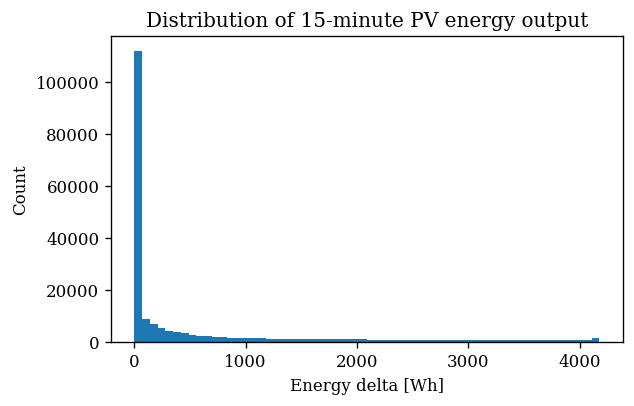

In [ ]:
# Fig. 3.2 – Distribution of 15-minute PV energy output
import numpy as np
import matplotlib.pyplot as plt

# 1) pick the target, keep finite & non-negative
y = df['Energy delta[Wh]'].to_numpy()
mask = np.isfinite(y) & (y >= 0)
y = y[mask]

# 2) optional: clip extreme tail for clearer visualization (training uses full range)
p99_5 = np.percentile(y, 99.5)
y_vis = np.clip(y, 0, p99_5)

# 3) plot (small on screen, high-res saved)
plt.rcParams.update({
    'font.family': 'DejaVu Serif',  # Word/print-safe; or leave default
    'font.size': 10,
})
fig = plt.figure(figsize=(5.2, 3.3), dpi=120)   # screen view
ax = fig.add_subplot(111)

ax.hist(y_vis, bins=60)
ax.set_xlabel('Energy delta [Wh]')
ax.set_ylabel('Count')
ax.set_title('Distribution of 15-minute PV energy output')

fig.tight_layout(pad=0.4)
fig.savefig('Fig_3_2_Hist_Energy.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
fig.savefig('Fig_3_2_Hist_Energy.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()


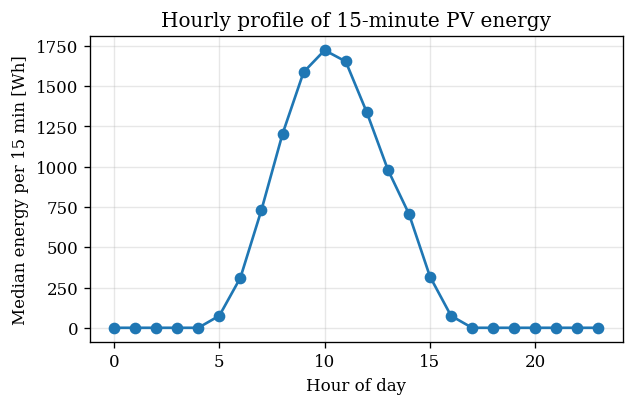

In [ ]:
# Fig. 3.3 – Hourly profile of 15-minute PV energy
import numpy as np, matplotlib.pyplot as plt, pandas as pd

df_hour = df.copy()
# keep valid, non-negative target; optional daytime filter if desired
mask = np.isfinite(df_hour['Energy delta[Wh]']) & (df_hour['Energy delta[Wh]'] >= 0)
df_hour = df_hour.loc[mask]

prof = df_hour.groupby('hour')['Energy delta[Wh]'].median().reindex(range(24), fill_value=np.nan)
plt.rcParams.update({'font.family':'DejaVu Serif','font.size':10})

fig = plt.figure(figsize=(5.2,3.3), dpi=120)
ax = fig.add_subplot(111)
ax.plot(prof.index, prof.values, marker='o', linewidth=1.6)
ax.set_xlabel('Hour of day')
ax.set_ylabel('Median energy per 15 min [Wh]')
ax.set_title('Hourly profile of 15-minute PV energy')
ax.grid(True, alpha=0.3)
fig.tight_layout(pad=0.4)
fig.savefig('Fig_3_3_Hourly_Profile.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
fig.savefig('Fig_3_3_Hourly_Profile.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()


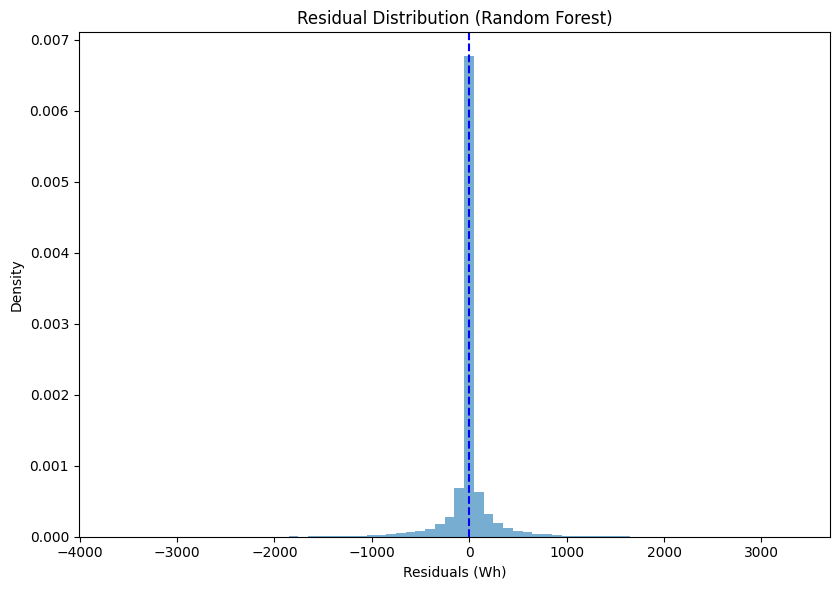

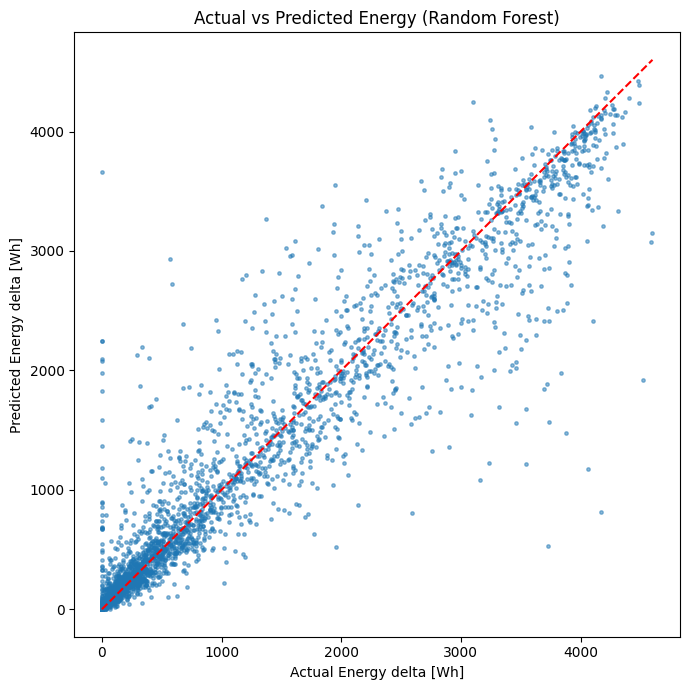

In [ ]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=80, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Residuals
res = y_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(8.5,6))
plt.hist(res, bins=70, density=True, alpha=0.6)
plt.axvline(0, linestyle="--", color="blue")
plt.xlabel("Residuals (Wh)")
plt.ylabel("Density")
plt.title("Residual Distribution (Random Forest)")
plt.tight_layout()
plt.savefig("Fig4_3_residual_RF.png", dpi=300)
plt.show()

# Define Random Generator
rng = np.random.default_rng(42)

# Actual vs Predicted
idx = rng.choice(len(y_test), size=min(6000, len(y_test)), replace=False)
plt.figure(figsize=(7,7))
plt.scatter(y_test.iloc[idx], y_pred[idx], s=6, alpha=0.5)
mn, mx = np.min(y_test.iloc[idx]), np.max(y_test.iloc[idx])
plt.plot([mn, mx], [mn, mx], linestyle="--", color="red")
plt.xlabel("Actual Energy delta [Wh]")
plt.ylabel("Predicted Energy delta [Wh]")
plt.title("Actual vs Predicted Energy (Random Forest)")
plt.tight_layout()
plt.savefig("Fig4_4_actual_vs_pred_RF.png", dpi=300)
plt.show()

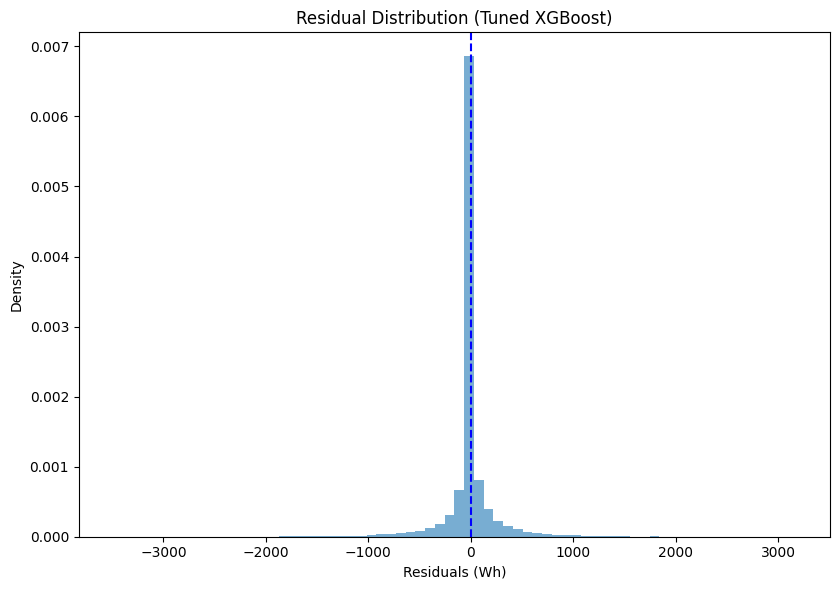

NameError: name 'rng' is not defined

In [ ]:
# Import XGBoost and necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the model
xgb = XGBRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Predict using the best model
y_pred = best_xgb.predict(X_test)

# Residuals
res = y_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(8.5,6))
plt.hist(res, bins=70, density=True, alpha=0.6)
plt.axvline(0, linestyle="--", color="blue")
plt.xlabel("Residuals (Wh)")
plt.ylabel("Density")
plt.title("Residual Distribution (Tuned XGBoost)")
plt.tight_layout()
plt.savefig("Fig4_3_residual_XGBoost.png", dpi=300)
plt.show()

# Actual vs Predicted Plot
idx = rng.choice(len(y_test), size=min(6000, len(y_test)), replace=False)
plt.figure(figsize=(7,7))
plt.scatter(y_test.iloc[idx], y_pred[idx], s=6, alpha=0.5)
mn, mx = np.min(y_test.iloc[idx]), np.max(y_test.iloc[idx])
plt.plot([mn, mx], [mn, mx], linestyle="--", color="red")
plt.xlabel("Actual Energy delta [Wh]")
plt.ylabel("Predicted Energy delta [Wh]")
plt.title("Actual vs Predicted Energy (Tuned XGBoost)")
plt.tight_layout()
plt.savefig("Fig4_4_actual_vs_pred_XGBoost.png", dpi=300)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 157420, number of used features: 15
[LightGBM] [Info] Start training from score 571.989080


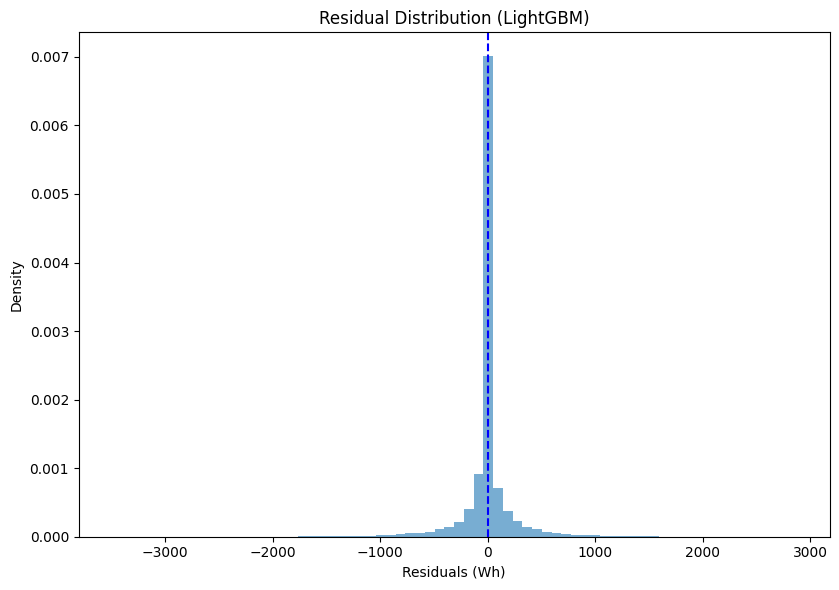

In [ ]:
# Import LightGBM and necessary libraries
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
param_grid = {
    'num_leaves': [31, 40, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}

# Create the model
lgbm = lgb.LGBMRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_lgbm = grid_search.best_estimator_

# Predict using the best model
y_pred = best_lgbm.predict(X_test)

# Residuals
res = y_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(8.5,6))
plt.hist(res, bins=70, density=True, alpha=0.6)
plt.axvline(0, linestyle="--", color="blue")
plt.xlabel("Residuals (Wh)")
plt.ylabel("Density")
plt.title("Residual Distribution (LightGBM)")
plt.tight_layout()
plt.savefig("Fig4_3_residual_LightGBM.png", dpi=300)
plt.show()


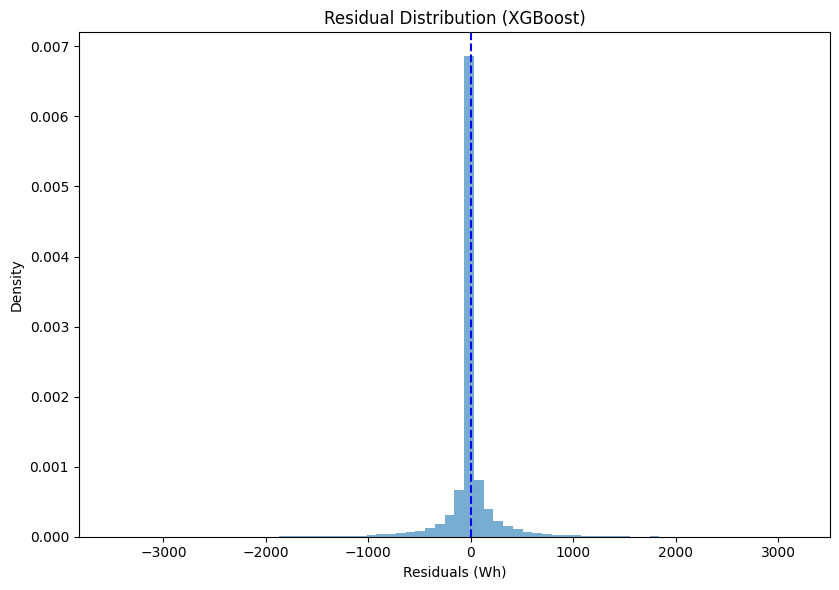

In [ ]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the XGBoost model
xgb = XGBRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Predict using the best model
y_pred = best_xgb.predict(X_test)

# Residuals (difference between actual and predicted)
res = y_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(8.5,6))
plt.hist(res, bins=70, density=True, alpha=0.6)
plt.axvline(0, linestyle="--", color="blue")
plt.xlabel("Residuals (Wh)")
plt.ylabel("Density")
plt.title("Residual Distribution (XGBoost)")
plt.tight_layout()
plt.savefig("Fig4_3_residual_XGBoost.png", dpi=300)
plt.show()